In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

rc('animation', html='html5')

In [2]:
# Classes

class Solver:
    def __init__(self, N = 500, M = 50, rng_x = (0,1.0), rng_t = (0, 1.0), name="name"):
        self.name = name
        self.N, self.M = N, M
        self.rng_x = rng_x
        self.rng_t = rng_t

        # spatial domain
        xmin, xmax = rng_x
        tmin, tmax = rng_t
        self.xmin, self.xmax = xmin, xmax
        self.tmin, self.tmax = tmin, tmax

        # x grid of n points
        self.X, self.dx = np.linspace(xmin,xmax,M,retstep=True)
        self.T, self.dt = np.linspace(tmin,tmax,N,retstep=True)

        # each value of the U array contains the solution for all x values at each timestep
        self.U = []

    # explicit euler solution
    def u(self, i, u_scheme, initial_u, par):
        X, dx = self.X, self.dx
        T, dt = self.T, self.dt
        n, m = len(X), len(T)

        par = par, n, m, dt, dx

        if i == 0: # initial condition
            return initial_u(X)
        uvals = [] # u values for this time step
        for j in range(len(X)):
            uvals.append(u_scheme(i, j, self.U, par))

        return uvals
    
    def equation(self, initial_u, u_scheme, par=False):
        # solve for 500 time steps
        for i in range(self.N):
            self.U.append(self.u(i, u_scheme, initial_u, par))
        
        return self.U, self.X

class Printer:
    def __init__(self, name="name"):
        self.name = name
        
    def animate(self, U, X):
        # plot solution
        plt.style.use('dark_background')
        fig = plt.figure()
        ax1 = fig.add_subplot(1,1,1)

        # animate the time data
        def animate_graph(i):
            # print(f'{i+1}/{len(U)}')
            x = U[i]
            ax1.clear()
            plt.plot(X,x,color='cyan')
            plt.grid(True)
            plt.ylim([-2,2])
            plt.xlim([0,1])

        anim = animation.FuncAnimation(fig,animate_graph,frames=len(U),interval=20)
        
        return anim


In [3]:
# Functions

def initial_u(x):
    return np.exp(-0.5*np.power(((x-0.5)/0.08), 2))

def scheme_0(i, j, y, par):
    c, n, m, dt, dx = par
    sigma = c*dt/(2*dx)

    if j == 0: # left boundary
        return y[i-1][j] + sigma*(y[i-1][j+1]-y[i-1][n-1])
    elif j == n-1: # right boundary
        return y[i-1][j] + sigma*(y[i-1][0]-y[i-1][j-1])
    else:
        return y[i-1][j] + sigma*(y[i-1][j+1]-y[i-1][j-1])


In [4]:
# Constants

N, M = 500, 50
c = 0.1
par = c

L = 1.0
T = abs(L / c)

In [5]:
# Main

solver = Solver(name="test", N = N, M = M, rng_x = (0,L), rng_t = (0, T))
printer = Printer(name="first")

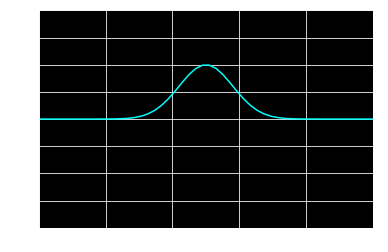

In [6]:
# Scheme_0

U, X = solver.equation(initial_u = initial_u, u_scheme=scheme_0, par=par)
animation = printer.animate(U, X)
animation